In [6]:
graphics_toolkit("gnuplot"); % this line is needed only in Octave

## Řešení 1d difúzní úlohy s materiálovým rozhraním pomocí metody konečných diferencí <br> (metoda sítí, finite differences method) 

Úkolem je vyřešit následující okrajovou úlohu pomocí metody konečných diferencí. Tuto úlohu umíme řešit i analyticky. Získané numerické řešení tedy porovnejte s analytickým a ověřte, zda je numerická aproximace přesnější, když použijete jemnější mřížku (vyšší hodnotu parametru **n**).

In [7]:
%% boundary value problem:
%   -k1*u1''(x)=f   in (0,M)
%   -k2*u2''(x)=f   in (M,L)
%   u1(0)=U
%   -k2*u2'(L)=T
%   u1(M)=u2(M)
%   k1*u1'(M+)=k2*u2'(M-)

Nastavení všech parametrů výše specifikované úlohy. <br> Začněte nejprve s těmito parametry a až úkol dokončíte, zkuste provádět jejich změny a zkoumat vliv na řešení úlohy.

In [8]:
f=0.2;
k1=2;
k2=1;
L=10;
M=5;
U=0;
T=-0.5;

Řešte úlohu nejprve pomocí metody konečných diferencí, tj. doplňte chybějící příkazy (využijte nápovědu v komentářích):

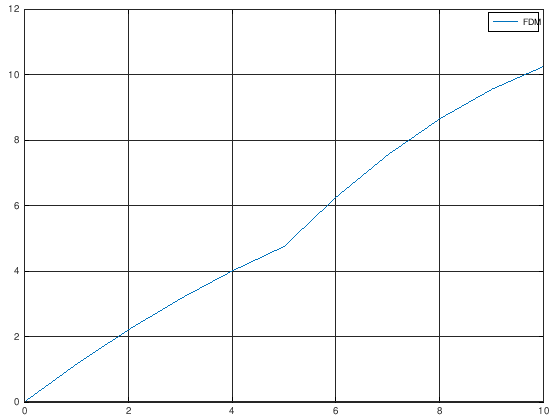

In [9]:
%% solution using finite diferences
n=10;           % number of steps (discretization intervals)
h=L/n;          % length of one step
A=diag(ones(n-1,1),-1)-2*diag(ones(n,1))+diag(ones(n-1,1),1); % matrix assembly
ind_M=round(n/L*M); % index of the point of material interface
k=[k1*ones(ind_M,1); k2*ones(n-ind_M,1)]; % vector of material parameters
b=-ones(n,1)*h^2*f./k; % right hand side
b(ind_M)=0; A(ind_M,ind_M-1:ind_M+1)=[k1 -k1-k2 k2]; % interface condition
b(1)=b(1)-U; % Dirichlet boundary condition
A(end,end)=A(end,end)+1; b(end)=b(end)+T/k2*h; % Neumann b. c.
u_FDM=A\b; u_FDM=[U; u_FDM]; % solution of the linear system
x_FDM=linspace(0,L,n+1); % points of visualization given by the discretization

figure(1)
plot(x_FDM,u_FDM) % plot of the numerical solution
legend('FDM');
grid on

Pro srovnání vyřešte úlohu také analyticky. Analytické řešení vykreslete a porovnejte s numerickým:

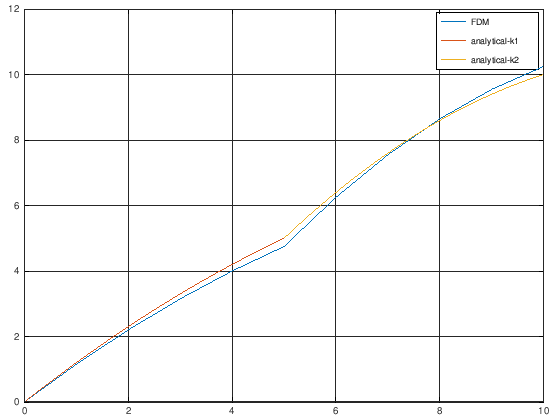

In [11]:
%% analytical solution
C2=U;
D1=(f*L-T)/k2;
C1=D1*k2/k1;
D2=-f/(2*k1)*M^2+C1*M+C2+f/(2*k2)*M^2-D1*M;
u1_analytical=@(x)-f/(2*k1)*x.^2+C1*x+C2;
u2_analytical=@(x)-f/(2*k2)*x.^2+D1*x+D2;
x1_analytical=linspace(0,M,100); % points of visualization
x2_analytical=linspace(M,L,100); % points of visualization

figure(2)
plot(x_FDM,u_FDM) % plot of the numerical solution
hold on
plot(x1_analytical,u1_analytical(x1_analytical)) % plot of the analytical solution
plot(x2_analytical,u2_analytical(x2_analytical)) % plot of the analytical solution
legend('FDM','analytical-k1','analytical-k2');
grid on